Step 1: Install and Import Necessary Libraries

In [1]:
#!pip install nltk textstat

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.probability import FreqDist
from textstat import flesch_reading_ease
import textstat
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to C:\Users\Shiqi
[nltk_data]     Xie\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Shiqi Xie\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to C:\Users\Shiqi
[nltk_data]     Xie\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Step 2: Define a Function to Extract Linguistic Features

In [2]:
def extract_linguistic_features(text):
    # Tokenize the text into words and sentences
    words = word_tokenize(text)
    sentences = sent_tokenize(text)

    # Get Part of Speech tags for each word
    pos_tags = nltk.pos_tag(words)

    # Calculate lexical diversity, which is the ratio of unique words to total words
    lexical_diversity = len(set(words)) / len(words) if words else 0

    # Calculate the average sentence length in words
    average_sentence_length = sum(len(sentence.split()) for sentence in sentences) / len(sentences) if sentences else 0

    # Calculate the average word length
    average_word_length = sum(len(word) for word in words) / len(words) if words else 0

    # Calculate the percentage of stopwords
    stop_words = set(stopwords.words('english'))
    num_stopwords = sum(1 for word in words if word.lower() in stop_words)
    stopwords_percentage = num_stopwords / len(words) if words else 0

    # Frequency distribution of Part of Speech tags
    pos_freq_dist = FreqDist(tag for (word, tag) in pos_tags)
    # Readibility scores
    readability = flesch_reading_ease(text)

    # Combine features into a dictionary, with keys as feature names
    features = {
        'lexical_diversity': lexical_diversity,
        'average_sentence_length': average_sentence_length,
        'average_word_length': average_word_length,
        'stopwords_percentage': stopwords_percentage,
        'readability': readability
    }
    features.update(pos_freq_dist)
    return features


Step 3: Prepare the Dataset and Extract Features

In [3]:
# Assuming you have a dataframe `df` with text data
df = pd.read_csv('combined_text_dataset.csv')
df['features'] = df['text'].apply(extract_linguistic_features)

# Convert the list of dictionaries into a DataFrame
features_df = pd.DataFrame(df['features'].tolist())

# If needed, fill NaN values with 0 (which indicates no occurrence of that feature)
features_df = features_df.fillna(0)


In [4]:
features_df

,lexical_diversity,average_sentence_length,average_word_length,stopwords_percentage,readability,NNP,PRP,(,:,NN,...,WP$,WP,RP,PDT,$,FW,#,UH,SYM,LS
0,0.643564,29.333333,4.534653,0.361386,50.30,32.0,6.0,2.0,3.0,20.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.584270,17.333333,4.651685,0.348315,62.38,28.0,2.0,1.0,0.0,27.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.474194,23.666667,4.829032,0.361290,61.87,47.0,2.0,0.0,0.0,45.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.601562,18.666667,4.234375,0.312500,61.16,28.0,2.0,1.0,0.0,16.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.390728,19.428571,4.596026,0.390728,43.32,5.0,0.0,0.0,0.0,41.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,0.529412,27.000000,4.819853,0.356618,46.81,31.0,4.0,0.0,0.0,36.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
299996,0.471503,17.200000,4.492228,0.373057,54.12,32.0,2.0,2.0,0.0,29.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
299997,0.550265,21.285714,4.322751,0.211640,52.60,59.0,1.0,0.0,0.0,12.0,...,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0
299998,0.533333,15.823529,4.370000,0.416667,72.36,32.0,4.0,1.0,0.0,47.0,...,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Step 4: Scale Features, Train and Evaluate the Model

In [5]:
# Split into features (X) and target variable (y)
X = features_df
y = df['label']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = model.predict(X_test_scaled)

# Print the classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.85      0.85      0.85     29938
           1       0.85      0.85      0.85     30062

    accuracy                           0.85     60000
   macro avg       0.85      0.85      0.85     60000
weighted avg       0.85      0.85      0.85     60000



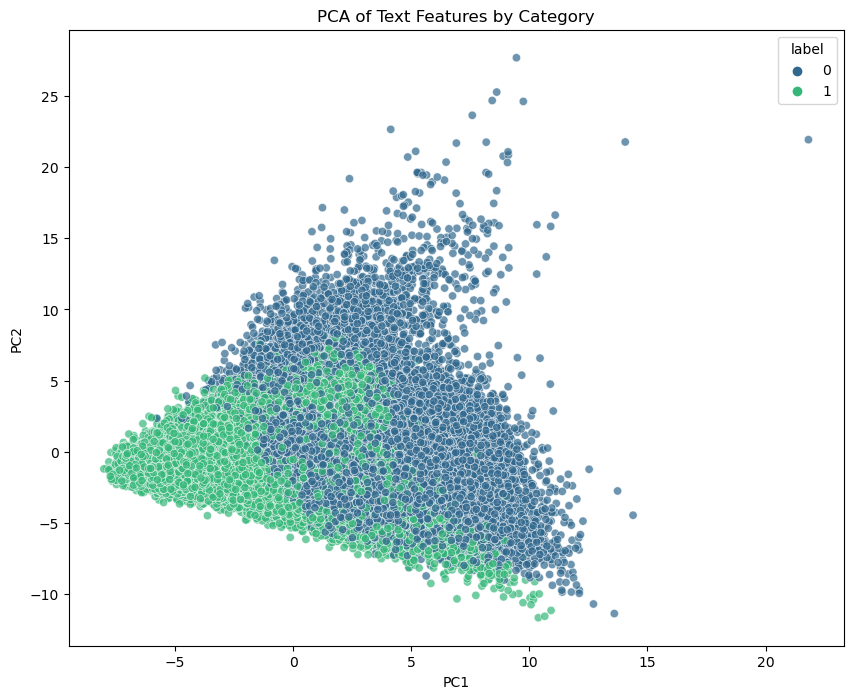

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

labels = df['label'] 

# Add the labels to the features_df for visualization purposes
features_df['label'] = labels

# Normalize features for PCA
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features_df.drop('label', axis=1))

# Apply PCA and reduce to two principal components for visualization
pca = PCA(n_components=2)
principal_components = pca.fit_transform(features_scaled)
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
principal_df['label'] = labels

# Scatter plot using the first two principal components
plt.figure(figsize=(10, 8))
sns.scatterplot(data=principal_df, x='PC1', y='PC2', hue='label', palette='viridis', alpha=0.7)
plt.title('PCA of Text Features by Category')
plt.show()


In [7]:
X

,lexical_diversity,average_sentence_length,average_word_length,stopwords_percentage,readability,NNP,PRP,(,:,NN,...,WP,RP,PDT,$,FW,#,UH,SYM,LS,label
0,0.643564,29.333333,4.534653,0.361386,50.30,32.0,6.0,2.0,3.0,20.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.584270,17.333333,4.651685,0.348315,62.38,28.0,2.0,1.0,0.0,27.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.474194,23.666667,4.829032,0.361290,61.87,47.0,2.0,0.0,0.0,45.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.601562,18.666667,4.234375,0.312500,61.16,28.0,2.0,1.0,0.0,16.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.390728,19.428571,4.596026,0.390728,43.32,5.0,0.0,0.0,0.0,41.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,0.529412,27.000000,4.819853,0.356618,46.81,31.0,4.0,0.0,0.0,36.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
299996,0.471503,17.200000,4.492228,0.373057,54.12,32.0,2.0,2.0,0.0,29.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
299997,0.550265,21.285714,4.322751,0.211640,52.60,59.0,1.0,0.0,0.0,12.0,...,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0
299998,0.533333,15.823529,4.370000,0.416667,72.36,32.0,4.0,1.0,0.0,47.0,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [8]:
features_df

,lexical_diversity,average_sentence_length,average_word_length,stopwords_percentage,readability,NNP,PRP,(,:,NN,...,WP,RP,PDT,$,FW,#,UH,SYM,LS,label
0,0.643564,29.333333,4.534653,0.361386,50.30,32.0,6.0,2.0,3.0,20.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.584270,17.333333,4.651685,0.348315,62.38,28.0,2.0,1.0,0.0,27.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.474194,23.666667,4.829032,0.361290,61.87,47.0,2.0,0.0,0.0,45.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.601562,18.666667,4.234375,0.312500,61.16,28.0,2.0,1.0,0.0,16.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.390728,19.428571,4.596026,0.390728,43.32,5.0,0.0,0.0,0.0,41.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,0.529412,27.000000,4.819853,0.356618,46.81,31.0,4.0,0.0,0.0,36.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
299996,0.471503,17.200000,4.492228,0.373057,54.12,32.0,2.0,2.0,0.0,29.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
299997,0.550265,21.285714,4.322751,0.211640,52.60,59.0,1.0,0.0,0.0,12.0,...,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0
299998,0.533333,15.823529,4.370000,0.416667,72.36,32.0,4.0,1.0,0.0,47.0,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [17]:
features_df.columns

Index(['lexical_diversity', 'average_sentence_length', 'average_word_length',
       'stopwords_percentage', 'readability', 'NNP', 'PRP', '(', ':', 'NN',
       'CD', ')', 'VBD', 'DT', 'IN', ',', 'RBR', 'RB', 'VBN', 'PRP$', 'CC',
       '.', 'JJ', 'NNS', 'VBG', 'NNPS', 'WDT', 'TO', 'VB', 'VBP', 'MD', 'VBZ',
       'JJS', 'EX', '``', '''', 'JJR', 'WRB', 'POS', 'RBS', 'WP$', 'WP', 'RP',
       'PDT', '$', 'FW', '#', 'UH', 'SYM', 'LS', 'label'],
      dtype='object')

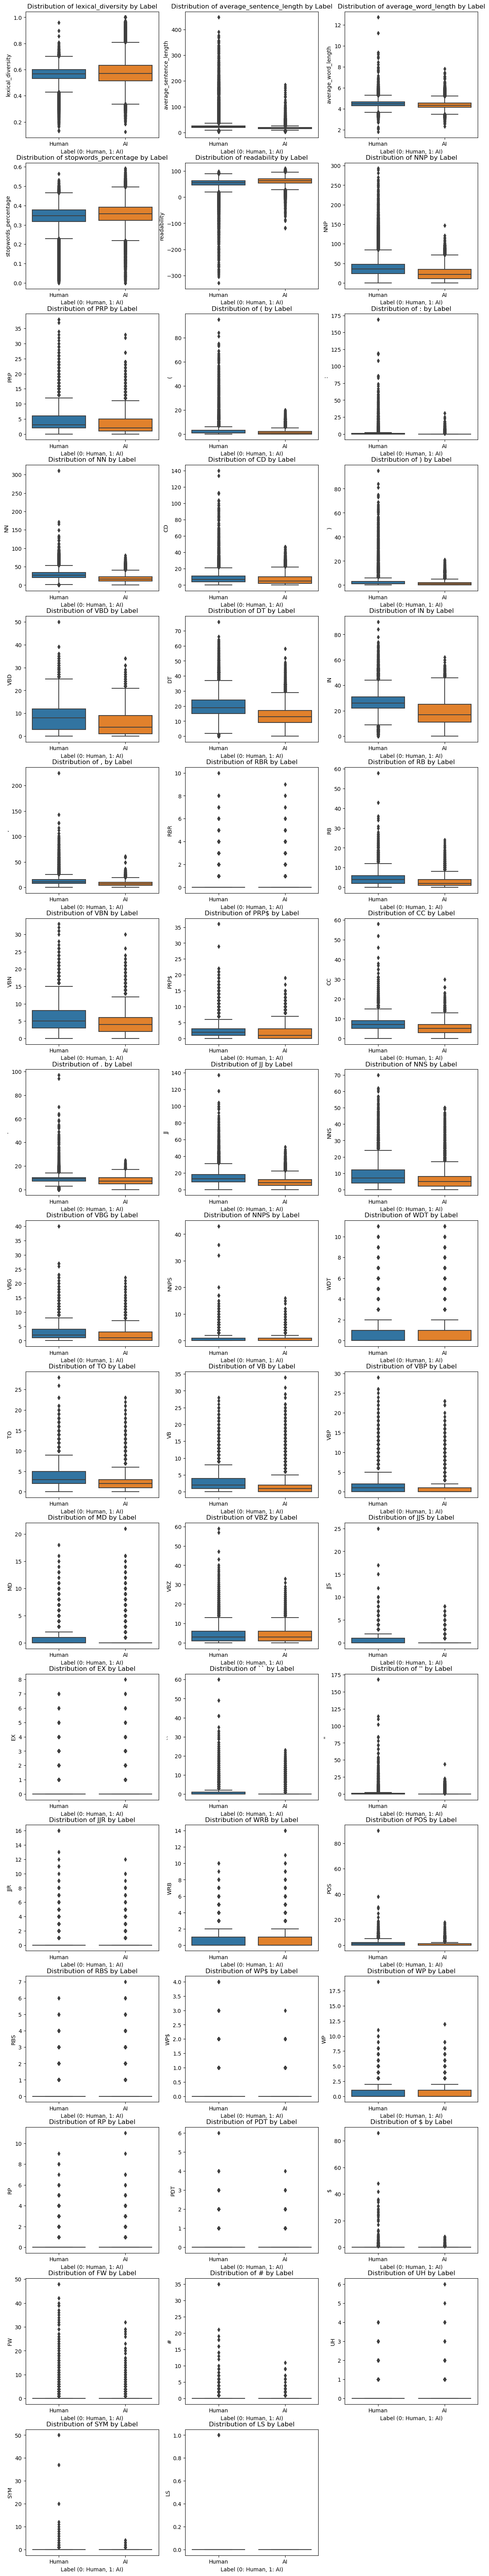

In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming features_df is your DataFrame containing the POS tag frequencies and the 'label' column

# List of POS tags for plotting
feature_columns = ['lexical_diversity', 'average_sentence_length', 'average_word_length', 'stopwords_percentage', 'readability', 'NNP', 'PRP', '(', ':', 'NN', 'CD', ')', 'VBD', 'DT', 'IN', ',', 'RBR', 'RB', 'VBN', 'PRP$', 'CC',
                   '.', 'JJ', 'NNS', 'VBG', 'NNPS', 'WDT', 'TO', 'VB', 'VBP', 'MD', 'VBZ', 'JJS', 'EX', '``', "''", 
                   'JJR', 'WRB', 'POS', 'RBS', 'WP$', 'WP', 'RP', 'PDT', '$', 'FW', '#', 'UH', 'SYM', 'LS']

# Calculate the number of rows needed
n_cols = 3  # Number of columns
n_rows = len(feature_columns) // n_cols + (len(feature_columns) % n_cols > 0)

# Set up the figure size to accommodate 3 square plots per row
plt.figure(figsize=(n_cols * 5, n_rows * 5))  # Width, Height in inches for each plot to be square

for i, feature in enumerate(feature_columns):
    plt.subplot(n_rows, n_cols, i + 1)  # Define subplot position
    sns.boxplot(x='label', y=feature, data=features_df)
    plt.title(f'Distribution of {feature} by Label')
    plt.xlabel('Label (0: Human, 1: AI)')
    plt.ylabel(feature)
    plt.xticks([0, 1], ['Human', 'AI'])  # Ensure x-tick labels are clearly labeled
    
    # Optional: Adjust the plot margins or spacing if necessary, uncomment the line below if needed
    # plt.tight_layout()

plt.show()
